In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('input_data/Classified Data',index_col=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [16]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [18]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [21]:
from sklearn.cross_validation import train_test_split

In [23]:
X = df_feat
y = df["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [27]:
pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [56]:
error_rate = []

In [58]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
error_rate.append(np.mean(pred_k != y_test))


In [59]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[154   5]
 [  7 134]]
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       159
          1       0.96      0.95      0.96       141

avg / total       0.96      0.96      0.96       300



Text(0.5,1,'Error value vs K')

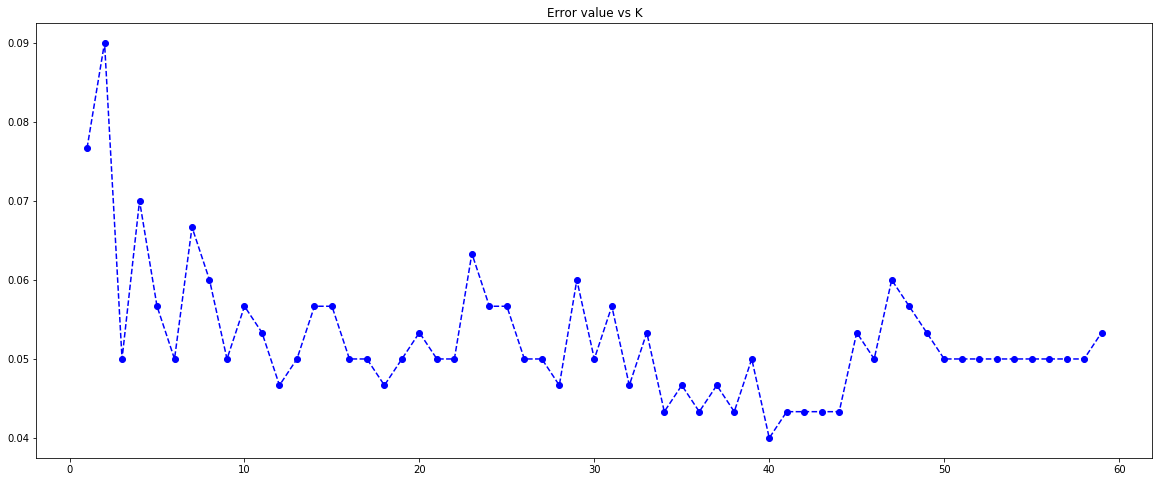

In [55]:
plt.figure(figsize=(20,8))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o')
plt.title('Error value vs K')